# Introduction to Tensorflow Keras framework
Author: Sada Narayanappa

## Create python environment

An example of creating environment on your machine.

```
python -m venv ~/venv/py39

# You may your initialization file (ex: .bashrc) 
alias py39='source ~/venv/py39/bin/activate'
py39

# If you are using vscode, set the path in "Python: Venv Path" to ~/venv
```

In [ ]:
# !pip install tensorflow

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# Keras Dense Layer

In the following cell, we will run a simple example and demonstrate what is a dense layer.
A dense layer with n1 inouts and n nodes will have n outputs. When we create it, by default it uses the bias.
In the following figure, can you guess the dimention of the weight matrix before you the run the cells?

<img width=128 src=../imgs/01_nn.png> 

In [ ]:
from tensorflow.keras.layers import Dense 
import numpy as np

d = Dense(3, activation="linear", input_shape = (2,), use_bias=True, name="f")
x = np.array([[1,2]])
d(x)
d.weights
d.get_weights()

In [ ]:
w = np.array([[1 ,  2 , 3],
              [0,   1 ,  2]])
b = np.array([0.,0.,0.])

d.set_weights([w,b])
d.weights

In [ ]:
d(x)

# Sequential Model

In [33]:
model = tf.keras.models.Sequential()
model.add(Dense(3, activation='relu', input_shape=(2,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='softmax'))

model(x)

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.10303701, 0.896963  ]], dtype=float32)>

In [34]:
model.weights

[<tf.Variable 'dense_6/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[-0.9034605 ,  0.17414463,  0.19057691],
        [ 0.9413123 , -0.81000626,  0.8113476 ]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_7/kernel:0' shape=(3, 3) dtype=float32, numpy=
 array([[ 0.21267438,  0.17995214,  0.6798191 ],
        [ 0.21814108,  0.80119085,  0.5527539 ],
        [-0.22595906,  0.97247195,  0.13554788]], dtype=float32)>,
 <tf.Variable 'dense_7/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_8/kernel:0' shape=(3, 2) dtype=float32, numpy=
 array([[ 0.00360417, -0.31164306],
        [-0.8558382 ,  0.80267847],
        [ 1.0781705 , -0.07699585]], dtype=float32)>,
 <tf.Variable 'dense_8/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

In [35]:
model.layers
model.layers[0].weights

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 9         
                                                                 
 dense_7 (Dense)             (None, 3)                 12        
                                                                 
 dense_8 (Dense)             (None, 2)                 8         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


# Real example

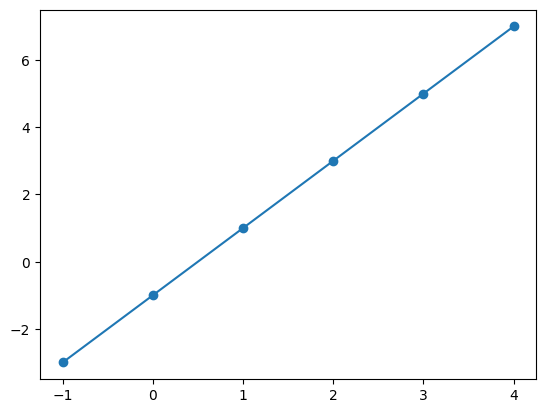

In [24]:
import matplotlib
import matplotlib.pyplot as plt

model = tf.keras.Sequential([Dense(units=3, input_shape=[1])])

model.compile(optimizer='sgd', loss='mean_squared_error')
# Declare model inputs and outputs for training
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

plt.plot(xs,ys, marker='o')

1/1 [==============================] - 0s 17ms/step


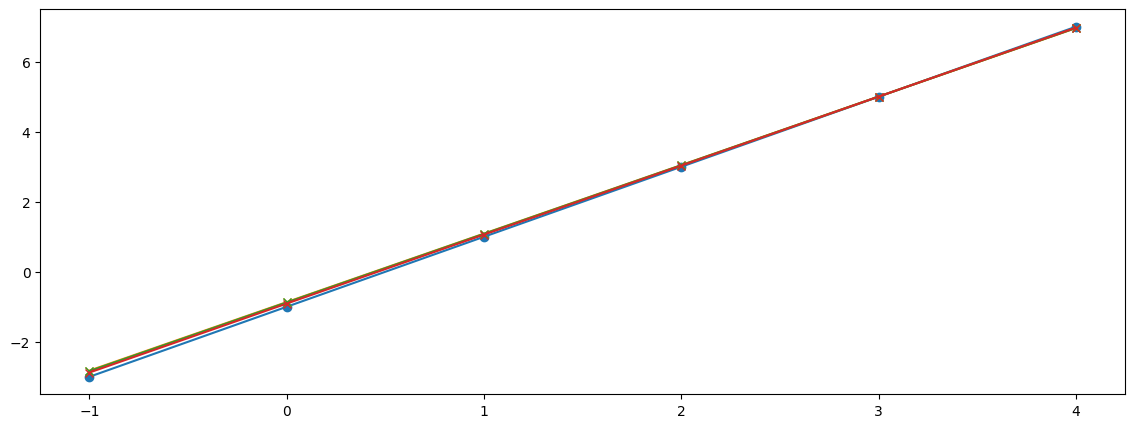

In [30]:
model.fit(xs, ys, epochs=50, verbose=False)
yh = model.predict(xs)

plt.figure(figsize=(14,5))
plt.plot(xs,ys, marker='o')
plt.plot(xs,yh, marker='x')

In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 3)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
